In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Maluku Utara.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  354 non-null    datetime64[ns]
 1   Tn       354 non-null    float64       
 2   Tx       354 non-null    float64       
 3   Tavg     354 non-null    float64       
 4   RH_avg   354 non-null    int64         
 5   RR       354 non-null    float64       
 6   ss       354 non-null    float64       
 7   ff_x     354 non-null    int64         
 8   ddd_x    354 non-null    int64         
 9   ff_avg   354 non-null    int64         
 10  ddd_car  354 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 30.5+ KB


C:\Users\rivan\AppData\Local\Temp\ipykernel_14372\2814723750.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.6,32.4,31.0,28.1
1,2023-02-01,24.4,33.2,0.0,28.3
2,2023-03-01,22.2,32.3,0.0,27.8
3,2023-04-01,23.2,33.8,0.0,27.9
4,2023-05-01,23.0,31.6,0.0,26.2
...,...,...,...,...,...
349,2023-12-16,24.2,32.5,0.0,28.4
350,2023-12-17,24.8,33.6,0.0,28.3
351,2023-12-18,23.2,33.6,0.0,28.2
352,2023-12-19,24.2,34.0,0.2,28.4


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

0

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.6,32.4,31.0,28.1
1,31,31,2023-01-02,24.0,31.3,20.2,26.8
2,59,59,2023-01-03,22.4,33.0,0.0,27.2
3,90,90,2023-01-04,23.0,32.6,0.0,26.2
4,120,120,2023-01-05,23.4,32.0,8.7,26.8
...,...,...,...,...,...,...,...
349,349,349,2023-12-16,24.2,32.5,0.0,28.4
350,350,350,2023-12-17,24.8,33.6,0.0,28.3
351,351,351,2023-12-18,23.2,33.6,0.0,28.2
352,352,352,2023-12-19,24.2,34.0,0.2,28.4


In [8]:
#cek null
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

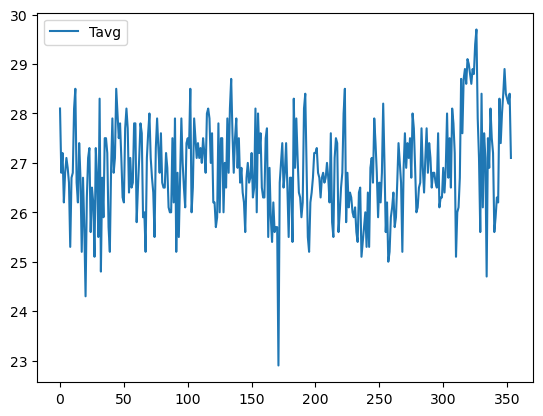

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

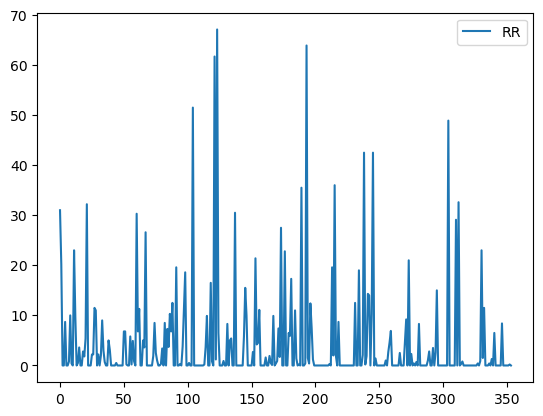

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.6,32.4,31.0,28.1,31.3,26.8,20.2
1,31,31,2023-01-02,24.0,31.3,20.2,26.8,33.0,27.2,0.0
2,59,59,2023-01-03,22.4,33.0,0.0,27.2,32.6,26.2,0.0
3,90,90,2023-01-04,23.0,32.6,0.0,26.2,32.0,26.8,8.7
4,120,120,2023-01-05,23.4,32.0,8.7,26.8,32.2,27.1,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,349,2023-12-16,24.2,32.5,0.0,28.4,33.6,28.3,0.0
350,350,350,2023-12-17,24.8,33.6,0.0,28.3,33.6,28.2,0.0
351,351,351,2023-12-18,23.2,33.6,0.0,28.2,34.0,28.4,0.2
352,352,352,2023-12-19,24.2,34.0,0.2,28.4,31.0,27.1,0.0


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,31.0,28.1,26.8,20.2
1,20.2,26.8,27.2,0.0
2,0.0,27.2,26.2,0.0
3,0.0,26.2,26.8,8.7
4,8.7,26.8,27.1,0.0
...,...,...,...,...
349,0.0,28.4,28.3,0.0
350,0.0,28.3,28.2,0.0
351,0.0,28.2,28.4,0.2
352,0.2,28.4,27.1,0.0


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,31.0,28.1,26.8,20.2
1,20.2,26.8,27.2,0.0
2,0.0,27.2,26.2,0.0
3,0.0,26.2,26.8,8.7
4,8.7,26.8,27.1,0.0
...,...,...,...,...
348,0.0,28.9,28.4,0.0
349,0.0,28.4,28.3,0.0
350,0.0,28.3,28.2,0.0
351,0.0,28.2,28.4,0.2


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,31.0,28.1,26.8,20.2,0
1,20.2,26.8,27.2,0.0,1
2,0.0,27.2,26.2,0.0,2
3,0.0,26.2,26.8,8.7,3
4,8.7,26.8,27.1,0.0,4
...,...,...,...,...,...
348,0.0,28.9,28.4,0.0,348
349,0.0,28.4,28.3,0.0,349
350,0.0,28.3,28.2,0.0,350
351,0.0,28.2,28.4,0.2,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,26.6
283,283,27.7
284,284,26.9
285,285,26.4
286,286,27.1
...,...,...
348,348,28.9
349,349,28.4
350,350,28.3
351,351,28.2


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([26.55141531, 26.84128957, 26.62883249, 26.49569088, 26.67981118,
       26.83749298, 26.5985974 , 26.75627921, 26.67601458, 26.51643448,
       26.59480081, 26.59385166, 26.54002553, 26.51263789, 26.80251216,
       26.40498562, 26.45691346, 26.45596431, 26.61364612, 26.48050451,
       26.61174782, 26.90162209, 26.55697254, 26.76753133, 26.50219726,
       26.92426399, 26.84399937, 26.68441927, 26.12826178, 26.36525906,
       26.3907484 , 26.54843021, 27.07625091, 26.78447835, 27.07435262,
       27.12628045, 27.04601583, 27.17725914, 27.1498715 , 27.09604537,
       27.04221924, 27.12058557, 27.09319793, 27.25087973, 27.32924606,
       26.85240405, 26.63994696, 26.24242043, 26.98174907, 26.37271459,
       26.76834283, 26.63520122, 25.99972826, 26.7390569 , 26.57947679,
       26.89578956, 26.73620945, 26.65594483, 26.2319798 , 26.31034613,
       26.41515095, 26.38776331, 26.94202251, 26.70312693, 26.86080873,
       26.96561355, 27.09685687, 26.96371526, 26.93632762, 26.90

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9315962041459925 1.363055752228965


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,26.6
283,283,27.7
284,284,26.9
285,285,26.4
286,286,27.1
...,...,...
348,348,28.9
349,349,28.4
350,350,28.3
351,351,28.2


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,26.551415
283,26.841290
284,26.628832
285,26.495691
286,26.679811
...,...
348,27.096857
349,26.963715
350,26.936328


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

C:\Users\rivan\AppData\Local\Temp\ipykernel_14372\2636922572.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,28.1,NaN
1,26.8,NaN
2,27.2,NaN
3,26.2,NaN
4,26.8,NaN
...,...,...
348,28.9,27.096857
349,28.4,26.963715
350,28.3,26.936328
351,28.2,26.908940


<Axes: >

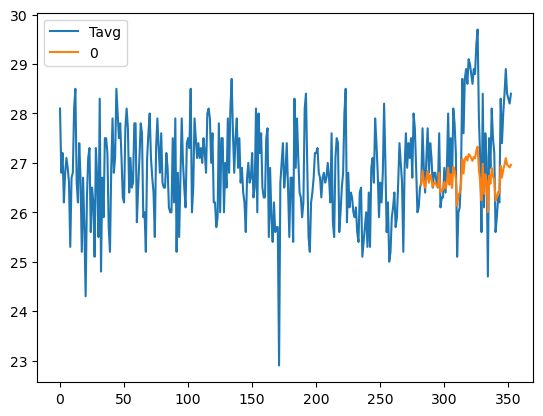

In [27]:
kan.plot()

In [28]:
new_data = [[354, 28.4],[355, 28.4],[356, 28.4],[357, 28.4],[358, 28.4],[359, 28.4],[360, 28.4]]
lr.predict(new_data)

C:\Users\rivan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26.95896952, 26.95802037, 26.95707122, 26.95612207, 26.95517293,
       26.95422378, 26.95327463])

In [30]:
kan.to_json('Prediksi Maluku Utara.json')